In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
data = pd.read_csv('instagram_data/natgeo_2019-11-21.csv')

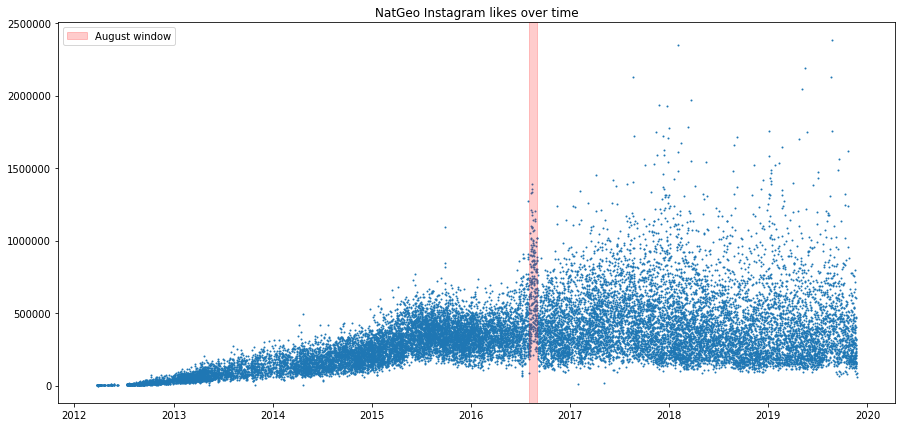

In [3]:
plt.figure(figsize=(15, 7))
plt.scatter(x=pd.to_datetime(data['created_time']), y=data['likes'], s=1)
# plt.axvspan('2016-08-05', '2016-09-04', color='b', alpha=0.2, label='Increased likes window')
plt.axvspan('2016-08-01', '2016-09-01', color='r', alpha=0.2, label='August window')
plt.legend()
plt.title('NatGeo Instagram likes over time')
plt.show()

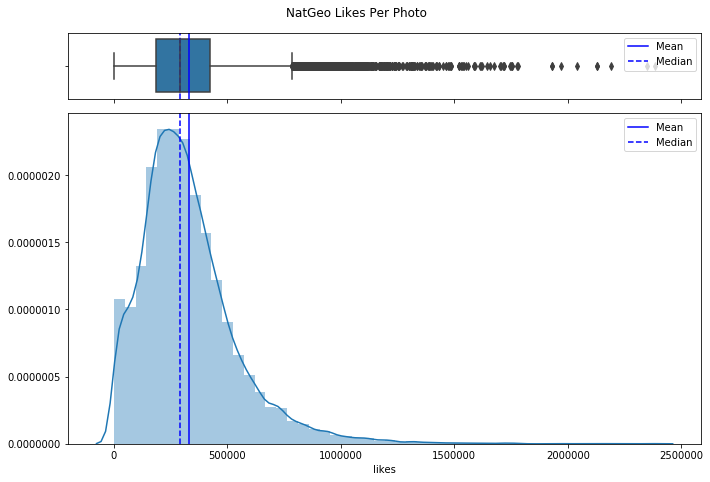

In [4]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10, 7))

mean = data['likes'].mean()
median = data['likes'].median()

sns.boxplot(data['likes'], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='-', label='Mean')
ax_box.axvline(median, color='b', linestyle='--', label='Median')
ax_box.legend()
ax_box.set(xlabel='')

sns.distplot(data['likes'])
plt.axvline(mean, color='b', linestyle='-', label='Mean')
plt.axvline(median, color='b', linestyle='--', label='Median')

plt.legend()

fig.suptitle('NatGeo Likes Per Photo')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [5]:
sample = data[(data['created_time'] >= '2016-07-01') & (data['created_time'] < '2016-10-01')][['created_time', 'likes']]

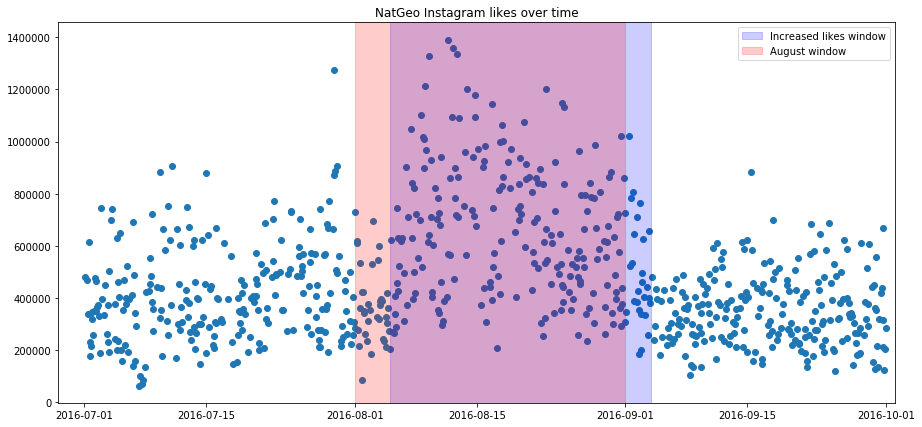

In [6]:
plt.figure(figsize=(15, 7))
plt.scatter(x=pd.to_datetime(sample['created_time']), y=sample['likes'])
plt.axvspan('2016-08-05', '2016-09-04', color='b', alpha=0.2, label='Increased likes window')
plt.axvspan('2016-08-01', '2016-09-01', color='r', alpha=0.2, label='August window')
plt.legend()
plt.title('NatGeo Instagram likes over time')
plt.xlim('2016-06-28', '2016-10-02')
plt.show()

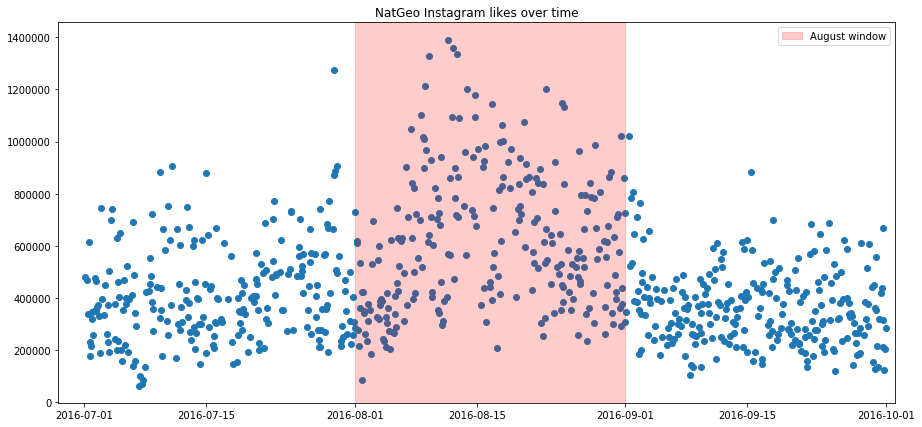

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(x=pd.to_datetime(sample['created_time']), y=sample['likes'])
plt.axvspan('2016-08-01', '2016-09-01', color='r', alpha=0.2, label='August window')
plt.legend()
plt.title('NatGeo Instagram likes over time')
plt.xlim('2016-06-28', '2016-10-02')
plt.show()

In [8]:
# adjust window for just the month of August (red window)
df1 = data[(data['created_time'] >= '2016-08-01') & (data['created_time'] < '2016-09-01')]
df0 = data[(data['created_time'] >= '2016-07-15') & (data['created_time'] < '2016-08-01') | 
           (data['created_time'] >= '2016-09-01') & (data['created_time'] < '2016-09-15')]

In [9]:
# # adjust window to period of increased likes (blue window)
# df1 = data[(data['created_time'] >= '2016-08-05') & (data['created_time'] < '2016-09-04')]
# df0 = data[(data['created_time'] >= '2016-07-15') & (data['created_time'] < '2016-08-05') | 
#            (data['created_time'] >= '2016-09-04') & (data['created_time'] < '2016-09-15')]

In [10]:
print(len(df0))
print(len(df1))
print(len(df0) / len(df1))

245
253
0.9683794466403162


In [11]:
print(df0['likes'].mean())
print(df1['likes'].mean())

408608.47346938774
616565.7628458499


In [12]:
print(df0['likes'].median())
print(df1['likes'].median())

383569.0
581120.0


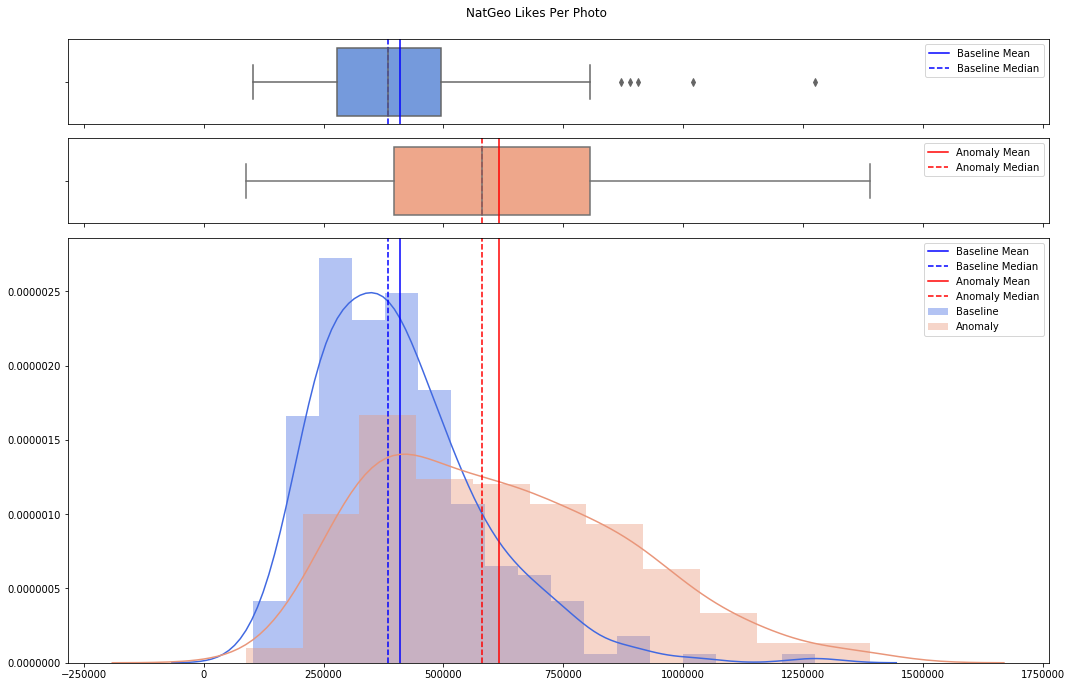

In [13]:
fig, (ax_box0, ax_box1, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw= {"height_ratios": (0.2, 0.2, 1)}, figsize=(15, 10))

mean0 = df0['likes'].mean()
median0 = df0['likes'].median()
mean1 = df1['likes'].mean()
median1 = df1['likes'].median()

sns.boxplot(df0['likes'], ax=ax_box0, color='cornflowerblue')
ax_box0.axvline(mean0, color='b', linestyle='-', label='Baseline Mean')
ax_box0.axvline(median0, color='b', linestyle='--', label='Baseline Median')
ax_box0.legend()
# ax_box0.title.set_text('Baseline')
ax_box0.set(xlabel='')

sns.boxplot(df1['likes'], ax=ax_box1, color='lightsalmon')
ax_box1.axvline(mean1, color='r', linestyle='-', label='Anomaly Mean')
ax_box1.axvline(median1, color='r', linestyle='--', label='Anomaly Median')
ax_box1.legend()
# ax_box1.title.set_text('Anomaly')
ax_box1.set(xlabel='')

sns.distplot(df0['likes'], color='royalblue', label='Baseline')
mean0 = df0['likes'].mean()
median0 = df0['likes'].median()
plt.axvline(mean0, color='b', linestyle='-', label='Baseline Mean')
plt.axvline(median0, color='b', linestyle='--', label='Baseline Median')

sns.distplot(df1['likes'], color='darksalmon', label='Anomaly')
mean1 = df1['likes'].mean()
median1 = df1['likes'].median()
plt.axvline(mean1, color='r', linestyle='-', label='Anomaly Mean')
plt.axvline(median1, color='r', linestyle='--', label='Anomaly Median')
ax_hist.set(xlabel='')

plt.legend()

fig.suptitle('NatGeo Likes Per Photo')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Student’s t-Test for Independent Samples

### Independent t-test formula

Let A and B represent the two groups to compare.
Let $m_A$ and $m_B$ represent the means of groups A and B, respectively.
Let $n_A$ and $n_B$ represent the sizes of group A and B, respectively.

The **t test statistic value** to test whether the means are different can be calculated as follows:

$$t = \frac{m_A - m_B}{\sqrt{ \frac{S^2}{n_A} + \frac{S^2}{n_B} }}$$

$S^2$ is an estimator of the common **variance** of the two samples. It can be calculated as follows:

$$S^2 = \frac{\sum{(x-m_A)^2}+\sum{(x-m_B)^2}}{n_A+n_B-2}$$

The **t-test statistic value** is used in a **[t-test table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)** to look up the **critical value of Student’s t distribution** corresponding to the **significance level alpha** of your choice (often chosen as 5%). The **degrees of freedom** (df) used in this test is:

$$df = n_A + n_B - 2$$

If the absolute value of the **t-test statistic** (|t|) is greater than the critical value, then the difference is significant. Otherwise the difference cannot be considered significant. The **level of significance** or (**p-value**) corresponds to the risk indicated by the **[t-test table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)** for the calculated |t| value.
The test can be used only when the two groups of samples (A and B) being compared follow bivariate **normal distribution** with equal **variances**.
If the variances of the two groups being compared are different, the **[Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)** can be used.

In [14]:
# calculate means
mean0, mean1 = np.mean(df0['likes']), np.mean(df1['likes'])

In [15]:
# calculate sample standard deviations
std0, std1 = np.std(df0['likes'], ddof=1), np.std(df1['likes'], ddof=1)

In [16]:
# calculate standard errors
n0, n1 = len(df0['likes']), len(df1['likes'])
se0, se1 = std0/np.sqrt(n0), std1/np.sqrt(n1)

In [17]:
# standard error on the difference between the samples
sed = np.sqrt(se0**2.0 + se1**2.0)

In [18]:
# calculate the t statistic
t_stat = (mean0 - mean1) / sed

In [19]:
# degrees of freedom
df = n0 + n1 - 2.

In [20]:
# calculate the critical value
alpha = 0.05
cv = stats.t.ppf(1. - alpha, df)

In [21]:
# calculate the p-value
p = (1. - stats.t.cdf(abs(t_stat), df)) * 2.

In [22]:
# print the t-statistic, the degrees of freedom, the critical value, and the p-value.
print('The t-statistic is {}'.format(t_stat))
print('The degrees of freedom is {}'.format(df))
print('The critical value is {}'.format(cv))
print('The p-value is {:.3e}'.format(p))
print()
print('If the absolute value of the t-stat is greater the critical value, we reject the null hypothesis that the means are equal')
print('If the p-value is less than or equal to the significance level, we reject the null hypothesis that the means are equal')

The t-statistic is -10.431478262230554
The degrees of freedom is 496.0
The critical value is 1.6479315230387215
The p-value is 0.000e+00

If the absolute value of the t-stat is greater the critical value, we reject the null hypothesis that the means are equal
If the p-value is less than or equal to the significance level, we reject the null hypothesis that the means are equal


In [23]:
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [24]:
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


# Student’s t-Test for Independent Samples with SciPy

In [25]:
stat, p = stats.ttest_ind(df0['likes'], df1['likes'])
print('t={:.3f}, p={:.3e}'.format(stat, p))

t=-10.363, p=6.558e-23


With a p-value that is essentially zero, and certainly less than our confidence value of 0.05, we reject the null hypothesis that the means are equal. In other words, there is a 1.84e-30% (essentially 0%) probability that this spike in likes during August 2016 would occur simply by random chance alone without any other influences. The data does not reveal what these influences could be but they could range anywhere from higher quality posts during August to an advertisement displayed only during August, to a marketing campaign to buy likes.